In [61]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
def print_populacao(populacao):
    for p in populacao:
        print(p)

In [63]:
def inicializar_mapa(p_zero, N):

    # Inicializando os parâmetros
    
    mapa = np.zeros((N,N))
    
    for i in range(0, N):
        for j in range(0, i):
            if random.random() > p_zero:
                mapa[i][j] = random.random()
                mapa[j][i] = mapa[i][j]
                
    return mapa

In [64]:

# Mapa mais complicado com pelo menos 10 paradas

def inicializar_mapa_complexo(p_zero, N, grupos):

    mapa = np.zeros((N,N))
    
    for i in range(0, N):
        for j in range(0, i):
            grupo_i = int(i/(N/grupos))
            grupo_j = int(j/(N/grupos))
            
            if random.random() > p_zero and abs(grupo_i - grupo_j) <= 1:
                mapa[i][j] = random.random()
                mapa[j][i] = mapa[i][j]
          
        
    ax = sns.heatmap(mapa)

    plt.show()
        
    return mapa

In [65]:
def criar_populacao_inicial(size, mapa):
    
    #Criar uma população de diferentes rotas de um tamanho fixo
    
    populacao = []
    
    for i in range(0,size):
        populacao.append(criar_novo_membro(mapa))
        
    return populacao

In [66]:
def fitness(rota, mapa):
    
    pontos = 0
    
    for i in range(1, len(rota)):
        if (mapa[rota[i-1]][rota[i]] == 0) and i != len(mapa)-1:
            print("AVISO: Rota Inválida")
            print(rota)
            print(mapa)
        pontos = pontos + mapa[rota[i-1]][rota[i]]

    return pontos

In [67]:
def cruzamento(a, b):
        
    #Pontos de cruzamento com os mesmo valor da posição do mapa
    elementos_comuns = set(a) & set(b)
    
    if len(elementos_comuns) == 2:
        return (a, b)
    else:
        elementos_comuns.remove(0)
        elementos_comuns.remove(max(a)) 
        value = random.sample(elementos_comuns, 1)        
    
    cortar_a = np.random.choice(np.where(np.isin(a, value))[0])
    cortar_b = np.random.choice(np.where(np.isin(b, value))[0])
    
    novo_a1 = copy.deepcopy(a[0:cortar_a])
    novo_a2 = copy.deepcopy(b[cortar_b:])
    
    novo_b1 = copy.deepcopy(b[0:cortar_b])
    novo_b2 = copy.deepcopy(a[cortar_a:])
    
    novo_a = np.append(novo_a1, novo_a2)
    novo_b = np.append(novo_b1, novo_b2)
       
    return (novo_a, novo_b)

In [68]:
def transformar(rota, probabilidade, mapa):
    
    nova_rota = copy.deepcopy(rota)
    
    for i in range(1, len(nova_rota)):
        if random.random() < probabilidade:
            
            go = True

            while go:

                valores_possiveis = np.nonzero(mapa[nova_rota[i-1]])
                valor_proposto = random.randint(0,len(valores_possiveis[0])-1)
                rota = np.append(nova_rota, valores_possiveis[0][valor_proposto])

                if nova_rota[i] == len(mapa)-1:
                    go = False
                else:
                    i += 1
    
    return nova_rota

In [69]:
def criar_novo_membro(mapa):
    
    # N é o tamanho do mapa

    N = len(mapa)
    
    rota = np.zeros(1, dtype=int)

    go = True
    
    i = 1
    
    while go:
        
        valores_possiveis = np.nonzero(mapa[rota[i-1]])
        valor_proposto = random.randint(0,len(valores_possiveis[0])-1)
        rota = np.append(rota, valores_possiveis[0][valor_proposto])
                
        if rota[i] == N-1:
            go = False
        else:
            i += 1
    
    return rota

In [70]:
def pontuacao_populacao(populacao, mapa):
    
    pontos = []
    
    for i in range(0, len(populacao)):
        pontos += [fitness(populacao[i], mapa)]
        
    return pontos

In [71]:
def escolher_campanheiro(pontos):

    array = np.array(pontos)
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))

    fitness = [len(ranks) - x for x in ranks]
    
    cum_scores = copy.deepcopy(fitness)
    
    for i in range(1,len(cum_scores)):
        cum_scores[i] = fitness[i] + cum_scores[i-1]
        
    probabilidade = [x / cum_scores[-1] for x in cum_scores]
    
    rand = random.random()
    
    for i in range(0, len(probabilidade)):
        if rand < probabilidade[i]:
            
            return i

In [90]:
def main():
    
    # parametros
    sparseness_of_map = 0.95
    size_of_map = 1000
    population_size = 30
    number_of_iterations = 1000
    number_of_couples = 9
    number_of_winners_to_keep = 2
    mutation_probability = 0.05
    number_of_groups = 1
    
    # inicialize o mapa e salve-o
    mapa = inicializar_mapa_complexo(sparseness_of_map, size_of_map, number_of_groups)

    # criar população inicial
    populacao = criar_populacao_inicial(population_size, mapa)

    ultima_distancia = 1000000000
    # Para um grande número de interação faça:
        
    for i in range(0,number_of_iterations):
        nova_pupulacao = []
        
        # avaliar a aptidão da população atual
        pontos = pontuacao_populacao(populacao, mapa)

        melhor = populacao[np.argmin(pontos)]
        numero_movimentos = len(melhor)
        distancia = fitness(melhor, mapa)
        
        if distancia != ultima_distancia:
            print('Interacao %i: O melhor ate agora sao %i passos para uma distancia %f' % (i, numero_movimentos, distancia))
            melhor_enredo(mapa, melhor, i)

        
          
        # Se a pontuacao deles forem mais alta, é provavel que eles reproduzam
        for j in range(0, number_of_couples):  
            novo_1, novo_2 = crossover(populacao[escolher_campanheiro(pontos)], populacao[escolher_campanheiro(pontos)])
            nova_populacao = nova_populacao + [novo_1, novo_2]
  
        # transformar
        for j in range(0, len( nova_populacao)):
             nova_populacao[j] = np.copy(mutate( nova_populacao[j], 0.05, the_map))
            
        # Manter membros da geração anterior
        nova_populacao += [populacao[np.argmin(pontos)]]
        for j in range(1, number_of_winners_to_keep):
            guardar = escolher_campanheiro(pontos)            
            nova_populacao += [populacao[guardar]]
            
        # adicionar novos membros aleatorios
        while len( nova_populacao) < population_size:
             nova_populacao += [criar_novo_membro(mapa)]
            
        #substituia a populacao antiga por uma real
        populacao = copy.deepcopy( nova_populacao)
                
        ultima_distancia = distancia
        

In [91]:
# traçar os resultados
def melhor_enredo(mapa, rota, numero_interacao):
    ax = sns.heatmap(mapa)

    x=[0.5] + [x + 0.5 for x in rota[0:len(rota)-1]] + [len(mapa) - 0.5]
    y=[0.5] + [x + 0.5 for x in rota[1:len(rota)]] + [len(mapa) - 0.5]
    
    plt.plot(x, y, marker = 'o', linewidth=4, markersize=12, linestyle = "-", color='white')
    plt.show()

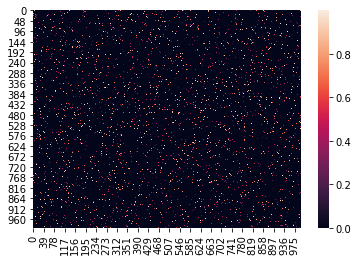

Interacao 0: O melhor ate agora sao 6 passos para uma distancia 2.947391


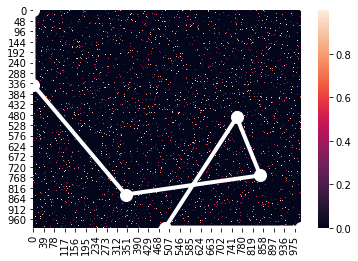

UnboundLocalError: ignored

In [92]:
main()